**Applied Empirical Analysis (HS 2020)**

**Conny Wunsch, Ulrike Unterhofer and Véra Zabrodina** -- University of Basel

***

# Lab Session 4 - Difference-in-Differences (DiD)

***

Key ingredients for a DiD design
* Reform or treatment introduced at time $t$ for eligible units (treated), not for others (control).
* Data on outcomes for at least one period before, and one after treatment.
* DiD is based on the idea that the difference in outcomes between eligible (D = 1) and ineligible (D = 0) workers in the pre-treatment period (T = 0) can be used to estimate selection bias, which can then be subtracted from the difference in outcomes between eligible (D = 1) and ineligible (D = 0) workers in the post-treatment period (T = 1).

## Application: The Arrival of Fast Internet and Employment in Africa
**Jonas Hjort and Jonas Poulsen, AER 2019**


## 1. Introduction

* What is the research question?
* Why is it interesting?
* What is the treatment? The outcome(s) of interest? 
* What is the main endogeneity problem?
* How do the authors solve it? 

In this replication, focus on South Africa (QLFS data). 



***

## 2. Identification strategy and assumptions



### Setup and notation

Exploit gradual connection to fast Internet via submarine cables over time

Compare individuals who are close vs. far from the existing backbone network (existing, within-country Internet network). 

* **Treated group ($D_{i} = 1$):** individuals situated in a location that lies within 500m of backbone network. 
* **Control group ($D_{i} = 0$):** individuals who are further than 500m away (but no more than 10km).
* **Treatment period ($T = 1$):** South Africa connected to submarine cables in 2009Q3.

Treatment defined at the location level. 

* Location 1: Treated, within 500m
* Location 2: Control, further than 500m
* Location 3: Excluded, more than 10km away


![](./Figure1.JPG)



| Observed outcomes | Unobserved (counterfactual) outcomes |
|----:|----:|
| $Y^*_{0,0}$ for $T=0$ and $D_{i}=0$ | $Y^*_{1,0}$ for $T=0$ and $D_{i}=0$ |
| $Y^*_{1,0}$ for $T=0$ and $D_{i}=1$ | $Y^*_{0,0}$ for $T=0$ and $D_{i}=1$ |
| $Y^*_{0,1}$ for $T=1$ and $D_{i}=0$ | $Y^*_{1,1}$ for $T=1$ and $D_{i}=0$ | 
| $Y^*_{1,1}$ for $T=1$ and $D_{i}=1$ | $Y^*_{0,1}$ for $T=1$ and $D_{i}=1$ |




### Discussion of assumptions

* What do these assumptions mean in words?
* What could invalidate them? Think of concrete examples or mechanisms.
* Which arguments or empirical evidence can you provide to support that they hold?


**A1: Stable unit treatment value assumption (SUTVA)**

$Y_{i,t}=D_{i}Y^*_{1,t}+(1-D_{i})Y^*_{0,t}$


**A2: No anticipation assumption**

${\rm E}[Y^*_{1,0}-Y^*_{0,0}|D=0]={\rm E}[Y^*_{1,0}-Y^*_{0,0}|D=1]=0$


**A3: Common trend assumption**

${\rm E}[Y^*_{0,1}-Y^*_{0,0}|D=0]={\rm E}[Y^*_{0,1}-Y^*_{0,0}|D=1]$


**What about covariates?**

Here, essentially do not use covariates for identification, only for robustness checks. 

Use location fixed effects to control for any time-invariant differences in employment outcomes that may be correlated with access to fast Internet.


**South Africa vs. other countries in the study**

* Location vs. grid-cell fixed effects.
* Only one period where treatment was introduced (same for all treated individuals, no straggered introduction).
* No need for country fixed effects.




***

## 3. Data

South African Quarterly Labour Force Survey. 

* What is the unit of observation? -- Individuals.  

* What is the time unit? -- Quarter.

* Is there more than two periods? -- Yes! from 2008Q1 to 2010Q2. Can support common trends and no anticipation assumptions. 

* Are the data panel or cross-sectional? -- Balanced panel of locations, but cross-section of individuals (so potentially different individuals in each period). Important to define what types of fixed effects can be included.



|variable name |   description |
|----:|----:|
| location       |  Location ID (enumeration area)   |
| quarter        |  Quarter (YYYYQ)   |
| time           |  Time (normalized to period before treatment, 2009Q2)   |
| distance       |  Distance in meters (111.32m = 0.001 decimal degree)   |
| employed       |  Employment (0/1)   |
| skilled        |  Skilled   |
| hoursworked    |  Hours worked   |
| loghours       |  Hours worked (asinh)   |
| workmore       |  Wants to work more (0/1)   |
| formal         |  Formal employment (0/1)   |
| informal       |  Informal employment (0/1)   |
| distance_road  |  Distance to road   |
| distance_elec  |  Distance to electricity |


***

## 4. Empirical Analysis

### Load packages

In [3]:
rm(list=ls())

packages_vector <- c("tidyverse", "foreign", "haven", "Hmisc", "dplyr", "tidyr", "stringr", "dummies", "sandwich", "lmtest",
     "expss", "fastDummies", "psych", "fBasics", "knitr", "xtable", "sjlabelled", "data.table", "lubridate", "arsenal", "stargazer", "mfx", "jtools")
lapply(packages_vector, require, character.only = TRUE) 

# DiD-specific packages 
packaged_vector_did <- c("fixest")
lapply(packaged_vector_did, require, character.only = TRUE) 

# List loaded packages 
(.packages())

print('All packages successfully installed and loaded.')

Loading required package: tidyverse

Warning message:
"package 'tidyverse' was built under R version 3.6.3"
Error: package or namespace load failed for 'tidyverse' in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 namespace 'tibble' 2.1.3 is already loaded, but >= 3.0.0 is required

Loading required package: foreign

Loading required package: haven

Warning message:
"package 'haven' was built under R version 3.6.3"
Loading required package: Hmisc

Warning message:
"package 'Hmisc' was built under R version 3.6.3"
Loading required package: lattice

Loading required package: survival

Warning message:
"package 'survival' was built under R version 3.6.3"
Loading required package: Formula

Loading required package: ggplot2

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

Attaching package: 'Hmisc'


The following objects are masked from 'package:base':

    format.pval, units


Loading required package: dplyr

Warning message:
"package 

[[1]]
[1] FALSE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] TRUE

[[8]]
[1] TRUE

[[9]]
[1] TRUE

[[10]]
[1] TRUE

[[11]]
[1] TRUE

[[12]]
[1] TRUE

[[13]]
[1] TRUE

[[14]]
[1] TRUE

[[15]]
[1] TRUE

[[16]]
[1] TRUE

[[17]]
[1] TRUE

[[18]]
[1] TRUE

[[19]]
[1] TRUE

[[20]]
[1] TRUE

[[21]]
[1] TRUE

[[22]]
[1] TRUE

[[23]]
[1] TRUE

Loading required package: fixest

Warning message:
"package 'fixest' was built under R version 3.6.3"

Attaching package: 'fixest'


The following object is masked from 'package:jtools':

    summ


The following object is masked from 'package:Hmisc':

    errbar




[[1]]
[1] TRUE

[1] "fixest"      "jtools"      "mfx"         "betareg"     "MASS"       
 [6] "stargazer"   "arsenal"     "lubridate"   "data.table"  "sjlabelled" 
[11] "xtable"      "knitr"       "fBasics"     "timeSeries"  "timeDate"   
[16] "psych"       "fastDummies" "expss"       "lmtest"      "zoo"        
[21] "sandwich"    "dummies"     "stringr"     "tidyr"       "dplyr"      
[26] "Hmisc"       "ggplot2"     "Formula"     "survival"    "lattice"    
[31] "haven"       "foreign"     "stats"       "graphics"    "grDevices"  
[36] "utils"       "datasets"    "methods"     "base"

[1] "All packages successfully installed and loaded."


### Load data 

In [4]:
data <- as.data.frame(read_dta("data.dta")) 

head(data)

,location,quarter,time,distance,employed,skilled,hoursworked,loghours,workmore,formal,informal,distance_road,distance_elec
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,10100017,20094,2,8810.14,1,0,45,4.499933,1,0,0,377.4297,14581.37
2,10100017,20094,2,8810.14,1,0,27,3.989327,1,0,0,377.4297,14581.37
3,10100017,20094,2,8810.14,1,0,36,4.276859,1,0,0,377.4297,14581.37
4,10100017,20094,2,8810.14,1,0,45,4.499933,1,0,0,377.4297,14581.37
5,10100017,20094,2,8810.14,1,0,45,4.499933,1,0,0,377.4297,14581.37
6,10100017,20094,2,8810.14,1,1,60,4.787561,0,0,0,377.4297,14581.37


***

## Descriptive statistics and validity checks

### Create and summarize DiD variables

In [5]:
# Treated group variable
radius <- 556.6 # preferred connection radius of 556.6m, i.e. 0.005 decimal degrees
data$connected <- ifelse(data$distance <= radius, 1, 0)

# Treatment period variable (after 2009Q3)
data$submarines <- ifelse(data$quarter>=20093, 1, 0)

# Treatment variable (treated x post)
data$treatment <- data$connected * data$submarines

did_vars <- c("connected", "submarines", "treatment")

# Attach data 
attach(data)

# Number of treated and control, before and after treatment
desc <- fBasics::basicStats(data[did_vars]) %>% t() %>% as.data.frame() %>% 
        dplyr::select(Mean, Stdev, Minimum, Maximum, nobs, NAs)
print(round(desc, digits=2))

# Overall
cro(connected, treatment)

# By quarter
cro(quarter, treatment)

           Mean Stdev Minimum Maximum   nobs NAs
connected  0.14  0.35       0       1 280641   0
submarines 0.38  0.49       0       1 280641   0
treatment  0.05  0.22       0       1 280641   0


|           |              | treatment |       |
 |           |              |         0 |     1 |
 | --------- | ------------ | --------- | ----- |
 | connected |            0 |    241656 |       |
 |           |            1 |     24098 | 14887 |
 |           | #Total cases |    265754 | 14887 |

|                 |              | treatment |       |
 |                 |              |         0 |     1 |
 | --------------- | ------------ | --------- | ----- |
 | Quarter (YYYYQ) |        20081 |     29786 |       |
 |                 |        20082 |     29170 |       |
 |                 |        20083 |     28945 |       |
 |                 |        20084 |     28805 |       |
 |                 |        20091 |     28891 |       |
 |                 |        20092 |     27922 |       |
 |                 |        20093 |     22754 |  3868 |
 |                 |        20094 |     23029 |  3606 |
 |                 |        20101 |     23225 |  3698 |
 |                 |        20102 |     23227 |  3715 |
 |                 | #Total cases |    265754 | 14887 |

### Summary statistics of outcomes by treatment group

As measured in first quarter of observation, before treatment, in 2008Q1.

In [6]:
outcomes <- c("employed", "skilled", "hoursworked", "workmore", "formal", "informal")

# Summary statistics - All 
desc <- fBasics::basicStats(data[outcomes], quarter==20081) %>% t() %>% as.data.frame() %>% 
    dplyr::select(Mean, Stdev, Minimum, Maximum, nobs, NAs)
print(round(desc, digits=2))

# Summary statistics - Treated 
desc_treat <- dplyr::filter(data[outcomes], connected==1 & quarter==20081) %>% 
    fBasics::basicStats() %>% t() %>% as.data.frame() %>% 
    dplyr::select(Mean, Stdev, Minimum, Maximum, nobs, NAs)
print(round(desc_treat, digits=2))

# Summary statistics - Control 
desc_control <- dplyr::filter(data[outcomes], connected==0 & quarter==20081) %>% 
    fBasics::basicStats() %>% t() %>% as.data.frame() %>% 
    dplyr::select(Mean, Stdev, Minimum, Maximum, nobs, NAs)
print(round(desc_control, digits=2))

             Mean Stdev Minimum Maximum   nobs   NAs
employed     0.71  0.45       0       1 280641     0
skilled      0.50  0.50       0       1 280641     0
hoursworked 44.49 13.88       1     112 280641 82247
workmore     0.17  0.38       0       1 280641 88854
formal       0.49  0.50       0       1 280641     0
informal     0.11  0.32       0       1 280641     0
             Mean Stdev Minimum Maximum nobs  NAs
employed     0.77  0.42       0       1 4084    0
skilled      0.55  0.50       0       1 4084    0
hoursworked 45.26 14.20       2     112 4084  970
workmore     0.22  0.41       0       1 4084 1063
formal       0.54  0.50       0       1 4084    0
informal     0.12  0.33       0       1 4084    0
             Mean Stdev Minimum Maximum  nobs  NAs
employed     0.71  0.45       0       1 25702    0
skilled      0.49  0.50       0       1 25702    0
hoursworked 45.38 15.03       1     112 25702 7547
workmore     0.20  0.40       0       1 25702 8045
formal       0.47  0.50 

### Common trends graph

Unadjusted means of the outcome variable by treatment group and quarter.

Figure 6 of HP

`summarise()` regrouping output by 'time' (override with `.groups` argument)



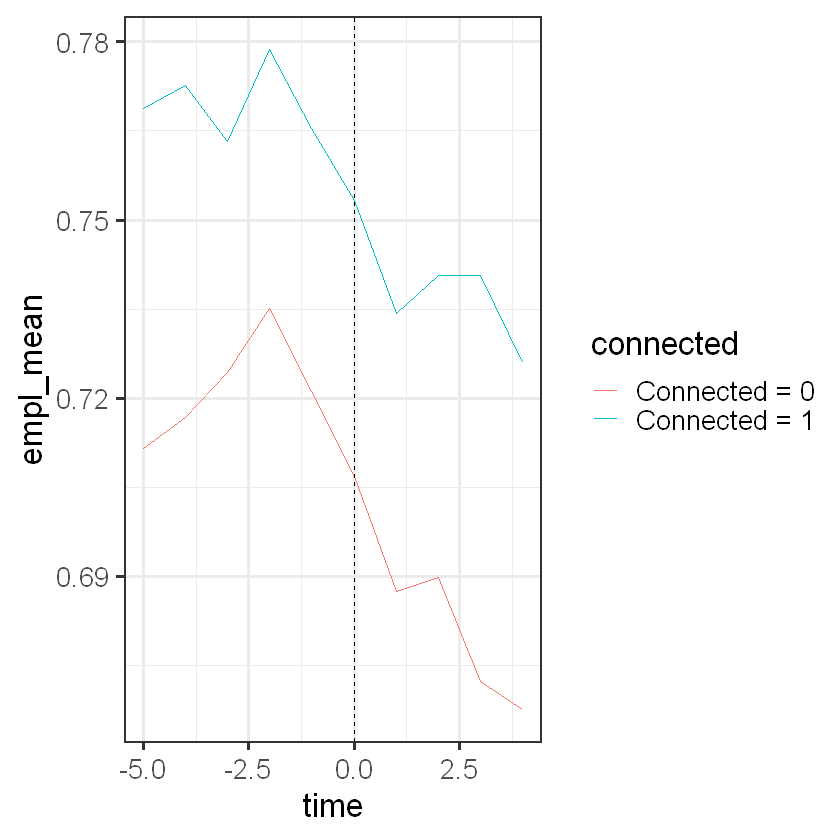

In [17]:
# Create a group-means data set
common_trends <- data %>% group_by(time, connected) %>% 
    summarise(empl_mean = mean(employed))

common_trends$connected <- factor(common_trends$connected, 
                        levels = c(0,1), label = c("Connected = 0", "Connected = 1")) 


ggplot(data = common_trends, aes(x = time, y = empl_mean, group = connected, color = connected)) + 
  geom_line() +
  geom_vline(xintercept = 0, linetype="dashed") +
  theme_bw(base_size = 20)
  # color legend
  # has 2 additional periods before compared to paper

`summarise()` regrouping output by 'time' (override with `.groups` argument)



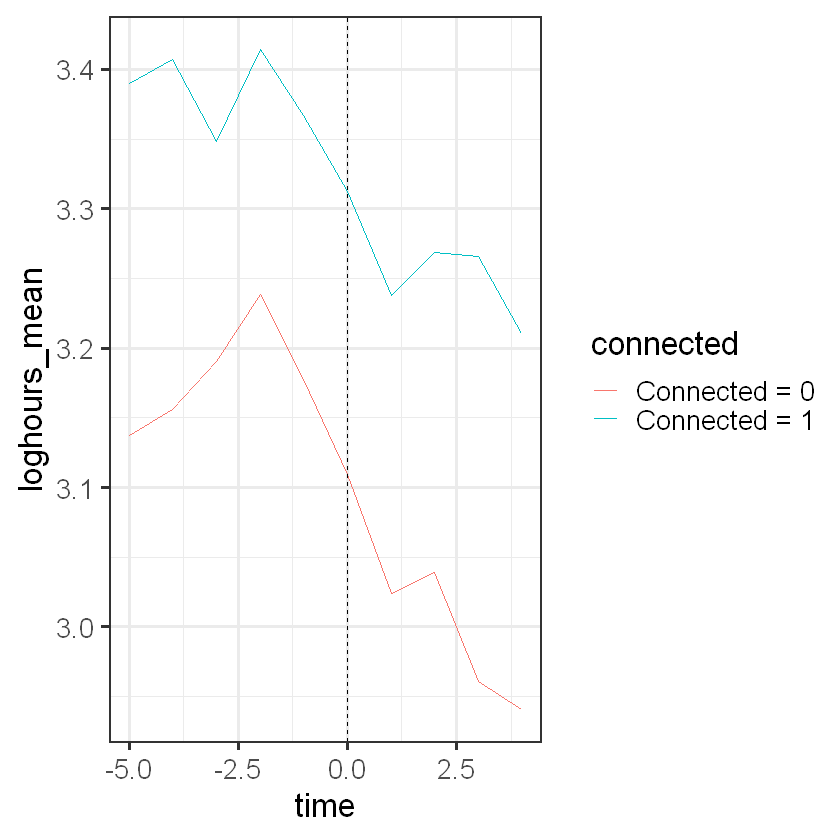

In [14]:
# Alternative outcome -  log hours worked
common_trends <- data %>% group_by(time, connected) %>% 
    summarise(loghours_mean = mean(loghours))

common_trends$connected <- factor(common_trends$connected, 
                        levels = c(0,1), label = c("Connected = 0", "Connected = 1")) 


ggplot(data = common_trends, aes(x = time, y = loghours_mean, 
                                group = connected, color = connected)) + 
  geom_line() +
  geom_vline(xintercept = 0, linetype="dashed") +
  theme_bw(base_size = 20)

***

## DiD effect estimation 

Using the `fixest` package.
For more details, see https://cran.r-project.org/web/packages/fixest/vignettes/fixest_walkthrough.html

### (1) Simple DiD, without fixed effects

Non-parametric difference in means.

$Y_{it} = \alpha + \delta Connected_i + \gamma SubmarineCables_t + \beta SubmarineCables_{t} \times Connected_i + \varepsilon_{it}$

where $Y_{it}$ is the outcome for individual $i$ in location $t$. The effect of interest is estimated by $\beta$. 
This specification is not in HP. 

Cluster standard errors by location. 

In [12]:
did1 <- feols(employed ~ connected + submarines + treatment, data)
did1 <- summ(did1, cluster = "location")
did1

OLS estimation, Dep. Var.: employed
Observations: 280,641 
Standard-errors: Clustered (location) 
             Estimate Std. Error    t value  Pr(>|t|)    
(Intercept)  0.719250   0.003752 191.690000 < 2.2e-16 ***
connected    0.047826   0.009961   4.801500  1.58e-06 ***
submarines  -0.040006   0.003892 -10.279000 < 2.2e-16 ***
treatment    0.008270   0.010102   0.818624  0.413001    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Log-likelihood: -175,692.10   Adj. R2: 0.00325 

### (2) Simple DiD with quarter fixed effects only

$Y_{it} =  \delta Connected_i + \gamma_t + \beta SubmarineCables_{t} \times Connected_i + \varepsilon_{it}$

where quarter fixed effects $\gamma_t$ absorb the $SubmarineCables_t$ variable, and the intercept. This specification is not in HP.  Control for any quarter-specific changes in employment outcomes.

In [13]:
did2 <- feols(employed ~ connected + treatment | time, data)
did2 <- summary(did2, cluster = "location")
did2

OLS estimation, Dep. Var.: employed
Observations: 280,641 
Fixed-effects: time: 10
Standard-errors: Clustered (location) 
          Estimate Std. Error  t value   Pr(>|t|)    
connected 0.047800   0.009959 4.799600 0.00000159 ***
treatment 0.008235   0.010097 0.815655 0.41469800    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Log-likelihood: -175,640.83   Adj. R2: 0.00358 
                            R2-Within: 0.00152 

### (3) Fixed effects with panel data, with quarter and location fixed effects 

Main specification in HP: Table 3, Panel A, column (3)

$Y_{it} = \delta_i + \gamma_t + \beta SubmarineCables_{t} \times Connected_i + \varepsilon_{it}$

where location fixed effects absorb the $Connected_i$ variable. 


In [14]:
did3 <- feols(employed ~ treatment | time + location, data)
did3 <- summary(did3, cluster = "location")
did3

OLS estimation, Dep. Var.: employed
Observations: 280,641 
Fixed-effects: time: 10,  location: 3169
Standard-errors: Clustered (location) 
          Estimate Std. Error t value Pr(>|t|)    
treatment 0.021732   0.007919  2.7442 0.006066 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Log-likelihood: -155,278.62   Adj. R2: 0.12834 
                            R2-Within: 6e-05 

### (4) Event study 


$Y_{i,t} = \delta_i + \gamma_t + \sum_{j=-T_{max}}^{T_{min}}\beta_j D_{i,t+j} +\varepsilon_{it}$

where $D_{i,t+j}$ denotes quarter x treatment group interaction terms, with the pre-treatment period (time = 0) the omitted reference 'category'. The quarter-specific 'treatment effect' is then $\beta_j$.


Serves to check plausibility of common trends and no anticipation assumptions. All coefficients on the leads of the treatment (pre-treatment) should not differ significantly from zero if CT holds. 

Shows potential gradual bite of treatment effect after implementation. 

Not shown in HP. 


OLS estimation, Dep. Var.: employed
Observations: 280,641 
Fixed-effects: time: 10,  location: 3169
Standard-errors: Clustered (location) 
                    Estimate Std. Error   t value Pr(>|t|)    
connected:time::-5  0.010123   0.010842  0.933768 0.350425    
connected:time::-4  0.006469   0.011183  0.578427 0.562976    
connected:time::-3 -0.012766   0.011028 -1.157600 0.247034    
connected:time::-2 -0.002988   0.009781 -0.305522 0.759969    
connected:time::-1 -0.001483   0.008600 -0.172410 0.863115    
connected:time::1   0.008713   0.009372  0.929755 0.352499    
connected:time::2   0.018491   0.010252  1.803700 0.071286 .  
connected:time::3   0.032733   0.011132  2.940600 0.003276 ** 
connected:time::4   0.030942   0.011314  2.734800 0.006242 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Log-likelihood: -155,272.22   Adj. R2: 0.12835 
                            R2-Within: 1e-04 

NULL

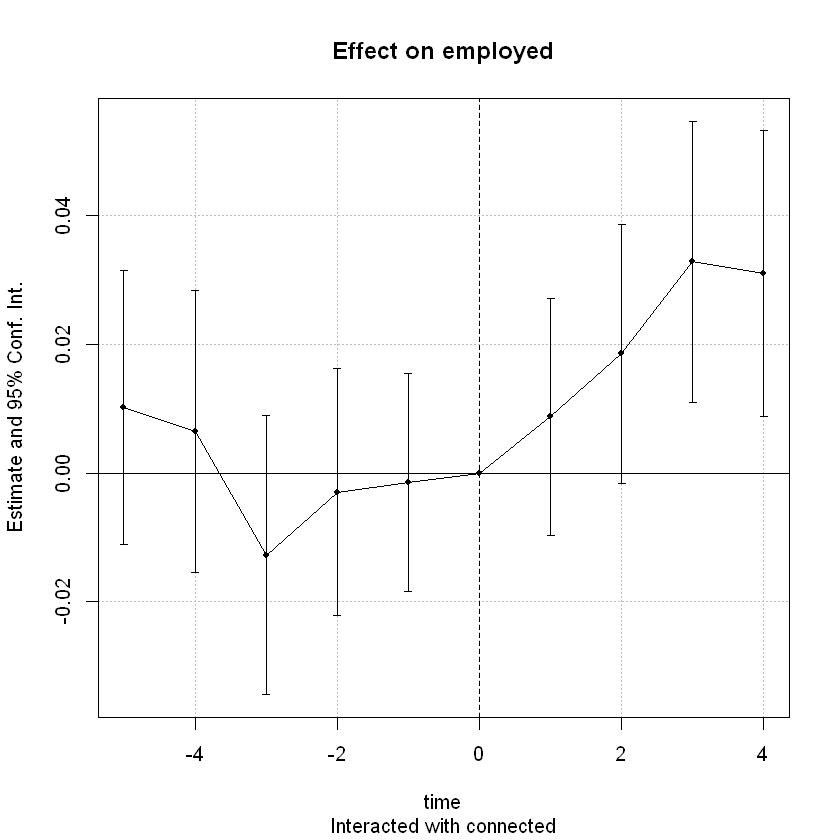

In [20]:
did4 <- feols(employed ~ connected::time(0) | time + location, data)
did4 <- summary(did4, cluster = "location")
did4

coefplot(did4) 

### Compare estimates

In [16]:
etable(did1, did2, did3, did4, 
    cluster="location", subtitles = c("Standard DiD", "Quarter FE", "Location + quarter FE", "Event study"))

,Standard DiD,Quarter FE,Location + quarter..,Event study
,<fct>,<fct>,<fct>,<fct>
(Intercept),0.7192*** (0.003752),,,
connected,0.04783*** (0.009961),0.0478*** (0.009959),,
submarines,-0.04001*** (0.003892),,,
treatment,0.00827 (0.0101),0.008235 (0.0101),0.02173** (0.007919),
connected:time::-5,,,,0.01012 (0.01084)
connected:time::-4,,,,0.006469 (0.01118)
connected:time::-3,,,,-0.01277 (0.01103)
connected:time::-2,,,,-0.002988 (0.009781)
connected:time::-1,,,,-0.001483 (0.0086)


***

## Extensions

### Varying the assumed connection radius 

Figure 4 in HP

The choice of 500m distance to define treated and control groups is arbitrary. Need to show that this choice makes sense, and varying this cutoff affects estimates in a sensible way (i.e. the effect decreases with distance). 

Rerun specification (3) with alternative definitions of the treated/control groups. 

In [17]:
# Define vector of radii
radius_range <- as.matrix(seq(400, 2000, by=100))

# Define function to estimate effect for each radius
radius_vary <- function(r) {          
  
  if (is.numeric(r)) {

    data$newconnected <- ifelse(distance <= r, 1, 0)
    data$newtreatment <- data$newconnected * submarines

    out <- feols(employed ~ newtreatment | time + location, data)
    list(radius=r, effect=out$coeftable[[1,1]], se=out$coeftable[[1,2]])

  } else {
    print("ERROR - Radius must be numeric")
  }

}

# Run function over rows (1) of possible radii vector
radius_out <- apply(radius_range, 1, radius_vary)

Warning message:
"Removed 6 rows containing missing values (geom_point)."


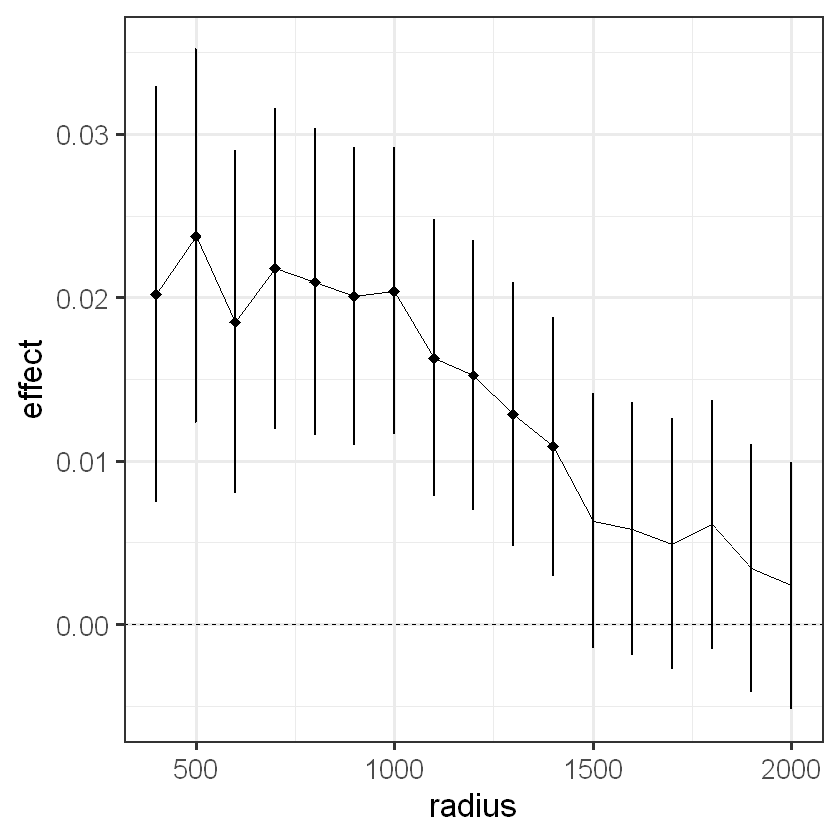

In [18]:
# Plot estimates

# convert list to table and create confidence intervals
radius_table <- rbindlist(radius_out)
radius_table$cil <- radius_table$effect - 1.96*radius_table$se
radius_table$cih <- radius_table$effect + 1.96*radius_table$se
radius_table$sig <- ifelse(abs(radius_table$effect)/radius_table$se>1.64, radius_table$effect, NA)


  ggplot(radius_table, aes(x = radius, y = effect)) +
    geom_line() +
    geom_point(aes(x = radius, y = sig), shape = 18, size  = 3) +
    geom_errorbar(aes(ymin  = cil, ymax  = cih), width = 0.2, size  = 0.7) +
    geom_hline(yintercept = 0, linetype="dashed") + 
    theme_bw(base_size = 20) 

### Placebo effect of road and electricity infrastructure 

Table 4, column (5) in HP (here, no data on 3G connectivity)

Connected locations are typically closer to other infrastructure (e.g. roads, electricity). If such infrastructure leads to systematically faster growth in employment, might misattribute effect of this infrastructure to fast Internet. 

Include 'placebo treatment' variables in specification (3), i.e. interaction terms between being connected to roads/electricity, and sthe arrival of submarine cables. 

In [19]:
# Create road and electricity connected variables
data$connected_elec <- ifelse(distance_elec <= radius, 1, 0)
data$connected_road <- ifelse(distance_road <= radius, 1, 0)

# Create placebo treatment variable (treated x post)
data$treatment_elec <- data$connected_elec * submarines
data$treatment_road <- data$connected_road * submarines

# Fixed effects DiD estimation (with location fixed effects)
out <- feols(employed ~ treatment + treatment_elec + treatment_road | time + location, data)
out <- summary(out, cluster = "location")
out

OLS estimation, Dep. Var.: employed
Observations: 280,641 
Fixed-effects: time: 10,  location: 3169
Standard-errors: Clustered (location) 
                Estimate Std. Error   t value Pr(>|t|)    
treatment       0.021410   0.007972  2.685800 0.007236 ** 
treatment_elec -0.012186   0.017042 -0.715064 0.474570    
treatment_road  0.000471   0.005968  0.078978 0.937050    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Log-likelihood: -155,277.94   Adj. R2: 0.12833 
                            R2-Within: 6e-05 

### Binary vs. continuous treatment 

What if the treatment was continuous instead of binary? 